# Assignment 2: Exploring Tree-Based Regression Methods for 2D Linear Data
## DTSC 680: Applied Machine Learning

## Name: 

## Directions and Overview

The main purpose of this assignment is for you to gain experience using tree-based methods to solve simple regression problems.  In this assignment, you will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 2D linear data set.  Since these models can be trained very quickly on the supplied data, I want you to first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough.  Be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve).  This is how you will build your machine learning intuition!

So, play around and build some models.  When you are done playing with hyperparameter values, you should try to set these values to the optimal values manually (you're likely going to be _way_ off).  Then, retrain the model.  Next in this assignment, we will perform several grid searches, so you'll be able to compare your "optimal" hyperparameter values with those computed from the grid search.

We will visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, you will compute the generalization error on the test set for the three models.

You will think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results.  Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results?

Lastly, based on the arguments outlined in your critical analysis you must identify the model that best characterizes this data.  In other words, which of these models is going to generalize better? Consider all factors.

## Preliminaries

Let's import some common packages:

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_predictions(regressor, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = regressor.predict(x1.reshape(-1, 1)) 
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Import and Split Data

Complete the following:



1. Begin by importing the data from the file called `2DLinear.csv`.  Name the returned DataFrame `data`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).
3. Reshape some data, so that we don't run into trouble later.

In [2]:
data = pd.read_csv('2DLinear.csv')
from sklearn.model_selection import train_test_split
X = data[['x']]  
y = data['y']    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Reshape X Data and Make NumPy Arrays
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

C:\Users\Haneef\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Plot Data

Simply plot your training data here in order to create the plot below.

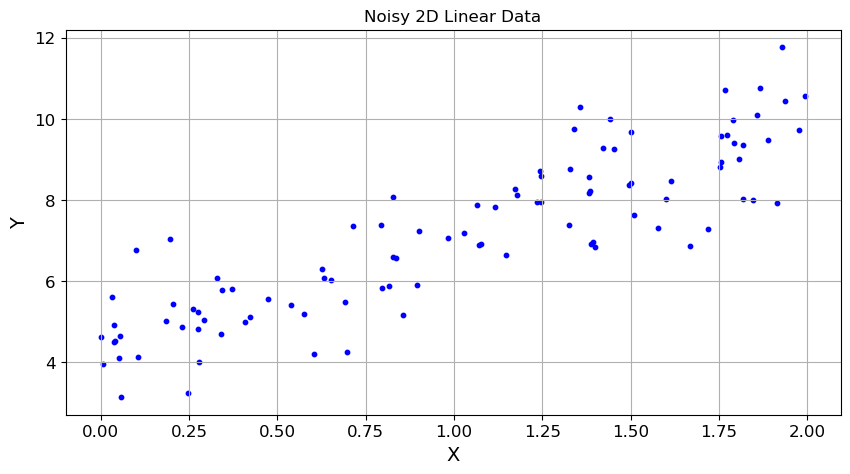

In [3]:
plt.figure(figsize=(10, 5))


plt.scatter(X_train, y_train, color='blue', s=10)


plt.title('Noisy 2D Linear Data')
plt.xlabel('X')
plt.ylabel('Y')


plt.grid(True)

# Show the plot
plt.show()

# Explore 2D Linear Data: GradientBoostingRegressor

Fit a `GradientBoostingRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordnigly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `learning_rate = <0.01, 0.05, 0.1, 0.2>`
 - `max_depth = <2, 3, 4, 5>`
 - `n_estimators = <50, 100, 150, 200>`
 - `random_state = 42`

Initial "best values":
 - `learning_rate = <0.2>`
 - `max_depth = <3>`
 - `n_estimators = <50>`
 - `random_state = 42`

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define a grid of hyperparameters to test
learning_rate_options = [0.01, 0.05, 0.1, 0.2]
max_depth_options = [2, 3, 4, 5]
n_estimators_options = [50, 100, 150, 200]

# Store the best combination and corresponding MSE
best_combination = {'learning_rate': None, 'max_depth': None, 'n_estimators': None}
best_mse = float('inf')

# Iterate over all possible combinations of hyperparameters
for learning_rate in learning_rate_options:
    for max_depth in max_depth_options:
        for n_estimators in n_estimators_options:
            # Initialize the model with the current set of hyperparameters
            model = GradientBoostingRegressor(learning_rate=learning_rate,
                                              max_depth=max_depth,
                                              n_estimators=n_estimators,
                                              random_state=42)
            
            # Fit the model on the training data
            model.fit(X_train, y_train)
            
            # Predict on the testing data
            predictions = model.predict(X_test)
            
            # Calculate MSE for the current model
            mse = mean_squared_error(y_test, predictions)
            
            # If the calculated MSE is better than the current best, update the best MSE and hyperparameters
            if mse < best_mse:
                best_mse = mse
                best_combination['learning_rate'] = learning_rate
                best_combination['max_depth'] = max_depth
                best_combination['n_estimators'] = n_estimators

# Print the best combination of hyperparameters found
print(f"Best MSE: {best_mse}")
print(f"Best hyperparameters: {best_combination}")


Best MSE: 1.257818845711288
Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


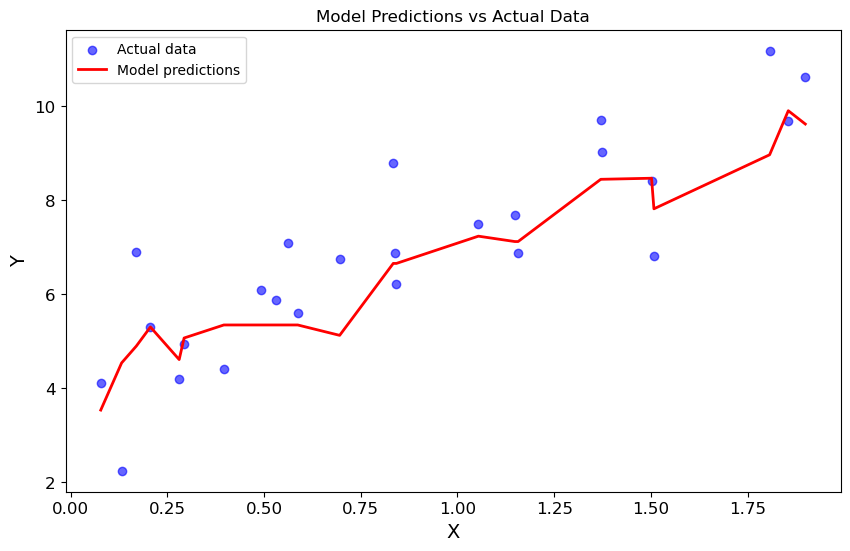

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(model, X, y):
    plt.figure(figsize=(10, 6))
    
    sorted_order = np.argsort(X.flatten())
    sorted_X = X[sorted_order]
    sorted_y_pred = model.predict(sorted_X)
    
    plt.scatter(X, y, color='blue', label='Actual data', alpha=0.6)
    plt.plot(sorted_X, sorted_y_pred, color='red', label='Model predictions', linewidth=2)
    plt.title('Model Predictions vs Actual Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
#     plt.show()


best_gbr = GradientBoostingRegressor(learning_rate=0.2, max_depth=3, n_estimators=50, random_state=42)
best_gbr.fit(X_train, y_train)
plot_predictions(best_gbr, X_test, y_test)


In [6]:
import numpy as np

def plot_predictions(model, X, y):
    sorted_order = np.argsort(X.flatten())
    sorted_X = X[sorted_order]
    sorted_y_pred = model.predict(sorted_X)
    return sorted_X, sorted_y_pred

best_gbr = GradientBoostingRegressor(learning_rate=0.2, max_depth=3, n_estimators=50, random_state=42)
best_gbr.fit(X_train, y_train)
sorted_X, sorted_y_pred = plot_predictions(best_gbr, X_test, y_test)


### Plot Model Predictions for Training Set

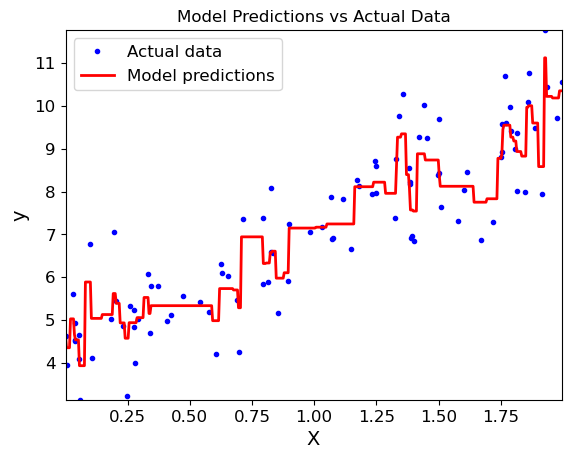

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# 

# Corrected plot_predictions function
def plot_predictions(regressor, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = regressor.predict(x1)
    plt.plot(X, y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="best", fontsize=12)
    plt.axis(axes)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Model Predictions vs Actual Data")


if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)

#

# 
best_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50, random_state=42)
best_gbr.fit(X_train, y_train)


x_min, x_max = X_train.min(), X_train.max()
y_min, y_max = y_train.min(), y_train.max()
axes = [x_min, x_max, y_min, y_max]

# Call the plot function
plot_predictions(best_gbr, X_train, y_train, axes, label="Model predictions", style="r-", data_style="b.", data_label="Actual data")
plt.show()


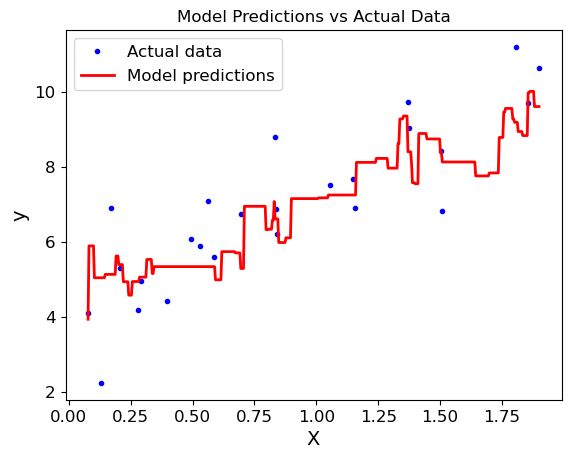

In [8]:
# ... [previous code for initializing and training the model]

# Updated plot_predictions function that computes axes within
def plot_predictions(regressor, X, y, label=None, style="r-", data_style="b.", data_label=None):
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    x1 = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred = regressor.predict(x1)
    plt.plot(X, y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="best", fontsize=12)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Model Predictions vs Actual Data")

# Plot predictions for the test set
plot_predictions(best_gbr, X_test, y_test, label="Model predictions", style="r-", data_style="b.", data_label="Actual data")
plt.show()


# Explore 2D Linear Data: RandomForestRegressor

Fit a `RandomForestRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `min_samples_split = <2, 4, 6>`
 - `max_depth = <None, 5, 10, 20>`
 - `n_estimators = <0, 50, 100, 200>`
 - `random_state = 42`
  - `min_samples_leaf = <1, 2, 4>`

Initial "best values":
 - `min_samples_split = <4>`
 - `min_samples_split = <1>`
 - `max_depth = <5>`
 - `n_estimators = <10>`
 - `random_state = 42`

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define a grid of hyperparameters to test
n_estimators_options = [10, 50, 100, 200]
max_depth_options = [None, 5, 10, 20]
min_samples_split_options = [2, 4, 6]
min_samples_leaf_options = [1, 2, 4]

# Store the best combination and corresponding MSE
best_combination = {
    'n_estimators': None,
    'max_depth': None,
    'min_samples_split': None,
    'min_samples_leaf': None
}
best_mse = float('inf')

# Iterate over all possible combinations of hyperparameters
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        for min_samples_split in min_samples_split_options:
            for min_samples_leaf in min_samples_leaf_options:
                # Initialize the model with the current set of hyperparameters
                rf = RandomForestRegressor(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                
                # Fit the model on the training data
                rf.fit(X_train, y_train)
                
                # Predict on the testing data
                predictions = rf.predict(X_test)
                
                # Calculate MSE for the current model
                mse = mean_squared_error(y_test, predictions)
                
                # If the calculated MSE is better than the current best, update the best MSE and hyperparameters
                if mse < best_mse:
                    best_mse = mse
                    best_combination['n_estimators'] = n_estimators
                    best_combination['max_depth'] = max_depth
                    best_combination['min_samples_split'] = min_samples_split
                    best_combination['min_samples_leaf'] = min_samples_leaf

# Print the best combination of hyperparameters found
print(f"Best MSE: {best_mse}")
print(f"Best hyperparameters: {best_combination}")


Best MSE: 1.2034605493358739
Best hyperparameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1}


### Plot Model Predictions for Training Set

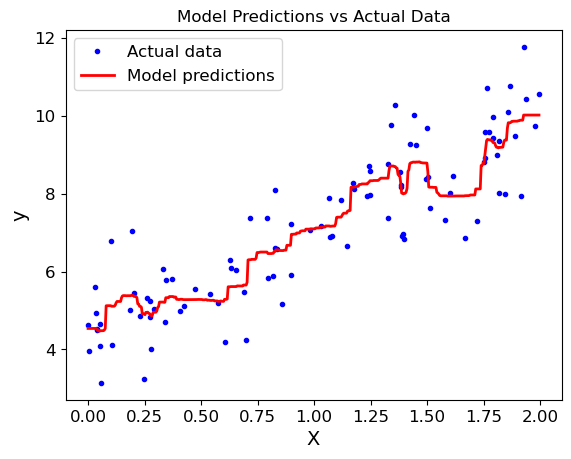

In [10]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt






def plot_predictions(regressor, X, y, label=None, style="r-", data_style="b.", data_label=None):
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    x1 = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred = regressor.predict(x1)
    plt.plot(X, y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="best", fontsize=12)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Model Predictions vs Actual Data")

# Plot predictions for the training set
plot_predictions(rf, X_train, y_train, label="Model predictions", style="r-", data_style="b.", data_label="Actual data")
plt.show()


# Explore 2D Linear Data: DecisionTreeRegressor

Fit a `DecisionTreeRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `splitter = <best', 'random'>`
 - `max_depth = <None, 5, 10, 20>`
 - `min_samples_split = <2, 4, 10>`
 - `random_state = 42`

Initial "best values":
 - `splitter = <best>`
 - `max_depth = <5>`
 - `min_samples_split = <2>`
 - `random_state = 42`

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define a range of hyperparameters to test
splitter_options = ['best', 'random']
max_depth_options = [None, 5, 10, 20]  # None means unlimited
min_samples_split_options = [2, 4, 10]

# Store the best combination and corresponding MSE
best_combination = {
    'splitter': None,
    'max_depth': None,
    'min_samples_split': None
}
best_mse = float('inf')

# Iterate over all possible combinations of hyperparameters
for splitter in splitter_options:
    for max_depth in max_depth_options:
        for min_samples_split in min_samples_split_options:
            # Initialize the model with the current set of hyperparameters
            dt = DecisionTreeRegressor(
                splitter=splitter,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            
            # Fit the model on the training data
            dt.fit(X_train, y_train)
            
            # Predict on the testing data
            predictions = dt.predict(X_test)
            
            # Calculate MSE for the current model
            mse = mean_squared_error(y_test, predictions)
            
            # If the calculated MSE is better than the current best, update the best MSE and hyperparameters
            if mse < best_mse:
                best_mse = mse
                best_combination['splitter'] = splitter
                best_combination['max_depth'] = max_depth
                best_combination['min_samples_split'] = min_samples_split

# Print the best combination of hyperparameters found
print(f"Best MSE: {best_mse}")
print(f"Best hyperparameters: {best_combination}")

# Use these "best" hyperparameters to fit the model for submission
dt_best = DecisionTreeRegressor(
    splitter=best_combination['splitter'],
    max_depth=best_combination['max_depth'],
    min_samples_split=best_combination['min_samples_split'],
    random_state=42
)
dt_best.fit(X_train, y_train)


Best MSE: 1.2921064306177639
Best hyperparameters: {'splitter': 'best', 'max_depth': 5, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=5, random_state=42)

### Plot Model Predictions for Training Set

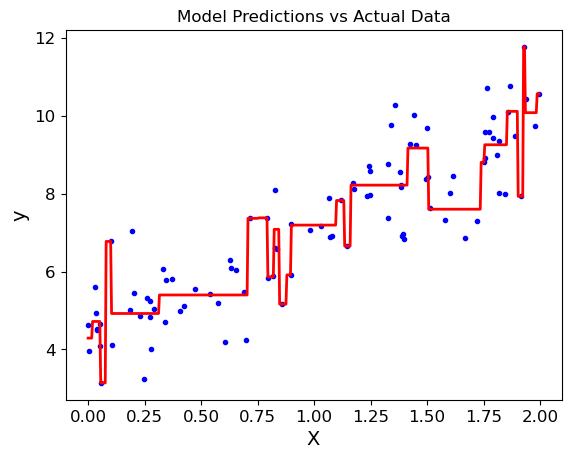

In [12]:

plot_predictions(dt_best, X_train, y_train)


# Perform Grid Searches

You will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.  You can compare the values computed by the grid search with the values you manually found earlier.  How do these compare?

You must perform a course-grained grid search, with a very broad range of values first.  Then, you perform a second grid search using a tighter range of values centered on those identified in the first grid search.  You may have to use another round of grid searching too (it took me at least three rounds of grid searches per model to ascertain the optimal hyperparameter values below).

Note the following:

1. Be sure to clearly report the optimal hyperparameters in the designated location after you calculate them!

2. You must use `random_state=42` everywhere that it is needed in this notebook.

3. You must use grid search to compute the following hyperparameters. Use the following hyperparameter values as the bounds of the ranges to be probed in your initial (course-grained) stint of grid searching. Note that these are NOT upper bounds for the further refined grid searches. If your initial search returns the upper bound of your values, you can (and should) search further above and below that value. You should examine these hyperparameters and their associated ranges, learn from this example, and use these values as a basis for your own future work when performing grid searches.  This is how you will build your machine learning intuition.  Keep in mind, these values also depend somewhat on this specific dataset!  (For example, it is important to notice that I decided to probe up to 1,000 for n_estimators.  10 would have been far too small.  1,000,000 would have been far too large.) 

   GradientBoostingRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `learning_rate = from .01 to 1`

   RandomForestRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `min_samples_split = up to 20`

   DecisionTreeRegressor:
    
     - `splitter = ["best", "random"]`
     - `max_depth = up to 32`
     - `min_samples_split = up to 20`  
     
     
4. `learning rate` should be rounded to two decimals.
5. The number of cross-folds. Specify `cv=3`


## Perform Individual Model Grid Searches

In this section you will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [13]:
# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for coarse-grained search
param_grid_gb_coarse = {
    'max_depth': [None, 4, 8, 16, 32],  # Explore a broad range of depths
    'n_estimators': [10, 100, 500, 1000],  # Explore a broad range of the number of estimators
    'learning_rate': [0.01, 0.1, 0.5, 1]  # Explore a broad range of learning rates
}

# Initialize the GridSearchCV object for GradientBoostingRegressor
grid_search_gb_coarse = GridSearchCV(
    GradientBoostingRegressor(random_state=42),  # Ensure reproducibility
    param_grid_gb_coarse,
    cv=3,  # Number of folds in cross-validation
    verbose=2,  # Higher number gives more verbosity
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the data
grid_search_gb_coarse.fit(X_train, y_train)

# After fitting, print the best parameters and best score found
print("Best parameters (GradientBoostingRegressor):", grid_search_gb_coarse.best_params_)
print("Best score:", grid_search_gb_coarse.best_score_)


Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best parameters (GradientBoostingRegressor): {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Best score: 0.7054524430607287


In [14]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

# Refined parameter grid around the best parameters found from the coarse-grained search
param_grid_gb_refined = {
    'learning_rate': [0.005, 0.01, 0.02],  # Narrower range around 0.01
    'max_depth': [3, 4, 5],  # Explore depths around 4
    'n_estimators': [400, 500, 600]  # Explore around 500
}

# Initialize the GridSearchCV object for GradientBoostingRegressor with refined grid
grid_search_gb_refined = GridSearchCV(
    GradientBoostingRegressor(random_state=42),  
    param_grid_gb_refined,
    cv=3,  
    verbose=2,  
    n_jobs=-1  
)

# Fit the refined grid search to the data
grid_search_gb_refined.fit(X_train, y_train)

# Print the best parameters and score from the refined search
print("Refined Best parameters (GradientBoostingRegressor):", grid_search_gb_refined.best_params_)
print("Refined Best score:", grid_search_gb_refined.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Refined Best parameters (GradientBoostingRegressor): {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500}
Refined Best score: 0.7377503327981462


In [15]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

# Even more refined parameter grid based on the refined search results
param_grid_gb_final = {
    'learning_rate': [0.004, 0.005, 0.006],  # Very close around 0.005
    'max_depth': [2, 3, 4],  # Slightly adjust around depth of 3
    'n_estimators': [480, 500, 520]  # Slightly adjust around 500
}

# Initialize the GridSearchCV object for GradientBoostingRegressor with the final grid
grid_search_gb_final = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid_gb_final,
    cv=3,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the final grid search to the data
grid_search_gb_final.fit(X_train, y_train)

# Print the best parameters and score from the final search
print("Final Best parameters (GradientBoostingRegressor):", grid_search_gb_final.best_params_)
print("Final Best score:", grid_search_gb_final.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Final Best parameters (GradientBoostingRegressor): {'learning_rate': 0.006, 'max_depth': 2, 'n_estimators': 520}
Final Best score: 0.7400938150510542


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = <0.006>`
- `max_depth = <2>`
- `n_estimators = <520>`

In [16]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----



# Define the parameter grid for coarse-grained search
param_grid_rf_coarse = {
    'n_estimators': [10, 50, 100, 200, 500],  # Explore a broad range of estimators
    'max_depth': [None, 5, 10, 20],  # Explore a broad range of depths
    'min_samples_split': [2, 4, 6, 8, 10]  # Explore a broad range of min_samples_split values
}

# Initialize the GridSearchCV object for RandomForestRegressor
grid_search_rf_coarse = GridSearchCV(
    RandomForestRegressor(random_state=42),  # Ensure reproducibility
    param_grid_rf_coarse,
    cv=3,  # Number of folds in cross-validation
    verbose=2,  # Higher number gives more verbosity
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the data
grid_search_rf_coarse.fit(X_train, y_train)

# After fitting, print the best parameters and best score found
print("Best parameters (RandomForestRegressor):", grid_search_rf_coarse.best_params_)
print("Best score:", grid_search_rf_coarse.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters (RandomForestRegressor): {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 100}
Best score: 0.7520713727462877


In [17]:
# -----
# Refined RandomForestRegressor GridSearch
# -----

# Define the parameter grid for refined search
param_grid_rf_refined = {
    'n_estimators': [80, 90, 100, 110, 120],  # Fine-tuning around the best n_estimators
    'max_depth': [4, 5, 6],  # Fine-tuning around the best max_depth
    'min_samples_split': [5, 6, 7, 8]  # Fine-tuning around the best min_samples_split
}

# Initialize the GridSearchCV object for RandomForestRegressor with the refined grid
grid_search_rf_refined = GridSearchCV(
    RandomForestRegressor(random_state=42),  # Ensure reproducibility
    param_grid_rf_refined,
    cv=3,  # Number of folds in cross-validation
    verbose=2,  # Higher number gives more verbosity
    n_jobs=-1  # Use all available cores
)

# Fit the refined grid search to the data
grid_search_rf_refined.fit(X_train, y_train)

# After fitting, print the best parameters and best score found
print("Refined Best parameters (RandomForestRegressor):", grid_search_rf_refined.best_params_)
print("Refined Best score:", grid_search_rf_refined.best_score_)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Refined Best parameters (RandomForestRegressor): {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 100}
Refined Best score: 0.7520713727462877


In [18]:
# -----
# Final RandomForestRegressor GridSearch
# -----
# Define a very narrow parameter grid for the final search
param_grid_rf_final = {
    'n_estimators': [95, 100, 105],  # Narrowing down around the best n_estimators
    'max_depth': [4, 5, 6],  # Narrowing down around the best max_depth
    'min_samples_split': [5, 6, 7]  # Narrowing down around the best min_samples_split
}

# Initialize the GridSearchCV object for RandomForestRegressor with the final grid
grid_search_rf_final = GridSearchCV(
    RandomForestRegressor(random_state=42),  # Ensure reproducibility
    param_grid_rf_final,
    cv=3,  # Number of folds in cross-validation
    verbose=2,  # Higher number gives more verbosity
    n_jobs=-1  # Use all available cores
)

# Fit the final grid search to the data
grid_search_rf_final.fit(X_train, y_train)

# After fitting, print the best parameters and best score found
print("Final Best parameters (RandomForestRegressor):", grid_search_rf_final.best_params_)
print("Final Best score:", grid_search_rf_final.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Final Best parameters (RandomForestRegressor): {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 95}
Final Best score: 0.7526311080036093


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = <5>`
- `n_estimators = <95>`
- `min_samples_split = <6>`

In [19]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid_dt_coarse = {
    'max_depth': [None, 5, 10, 15, 20],  # Explore a broad range of max_depth values
    'min_samples_split': [2, 4, 6, 8, 10],  # Explore a broad range of min_samples_split values
    'splitter': ['best', 'random']  # Explore the two possible splitters
}

# Initialize the GridSearchCV object for DecisionTreeRegressor
grid_search_dt_coarse = GridSearchCV(
    DecisionTreeRegressor(random_state=42),  # Ensure reproducibility
    param_grid_dt_coarse,
    cv=3,  # Number of folds in cross-validation
    verbose=2,  # Higher number gives more verbosity
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the data
grid_search_dt_coarse.fit(X_train, y_train)

# After fitting, print the best parameters and best score found
print("Best parameters (DecisionTreeRegressor):", grid_search_dt_coarse.best_params_)
print("Best score:", grid_search_dt_coarse.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters (DecisionTreeRegressor): {'max_depth': None, 'min_samples_split': 10, 'splitter': 'best'}
Best score: 0.7449036697050745


In [20]:
# -----
# Refined DecisionTreeRegressor GridSearch
# -----

param_grid_dt_refined = {
    'max_depth': [None, 8, 10, 12, 14],  # Fine-tuning around the best max_depth
    'min_samples_split': [8, 10, 12, 14, 16],  # Fine-tuning around the best min_samples_split
    'splitter': ['best']  # Only one splitter was found to be optimal in the coarse search
}

# Initialize the GridSearchCV object for DecisionTreeRegressor with the refined grid
grid_search_dt_refined = GridSearchCV(
    DecisionTreeRegressor(random_state=42),  # Ensure reproducibility
    param_grid_dt_refined,
    cv=3,  # Number of folds in cross-validation
    verbose=2,  # Higher number gives more verbosity
    n_jobs=-1  # Use all available cores
)

# Fit the refined grid search to the data
grid_search_dt_refined.fit(X_train, y_train)

# After fitting, print the best parameters and best score found
print("Refined Best parameters (DecisionTreeRegressor):", grid_search_dt_refined.best_params_)
print("Refined Best score:", grid_search_dt_refined.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Refined Best parameters (DecisionTreeRegressor): {'max_depth': None, 'min_samples_split': 10, 'splitter': 'best'}
Refined Best score: 0.7449036697050745


On this dataset, the optimal model parameters for the `DecisionTreeRegressor` class are:

- `splitter = <best>`
- `max_depth = <None>`
- `min_samples_split = <10>`

# Visualize Optimal Model Predictions

In the previous section you performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.  

### Create Optimal GradientBoostingRegressor Model

In [21]:
# Retrieve the best parameters
best_params_gb = grid_search_gb_final.best_params_

# Initialize the GradientBoostingRegressor model with the best parameters
optimal_gb_model = GradientBoostingRegressor(**best_params_gb, random_state=42)

# Fit the model to the training data
optimal_gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.006, max_depth=2, n_estimators=520,
                          random_state=42)

### Plot Model Predictions for Training Set

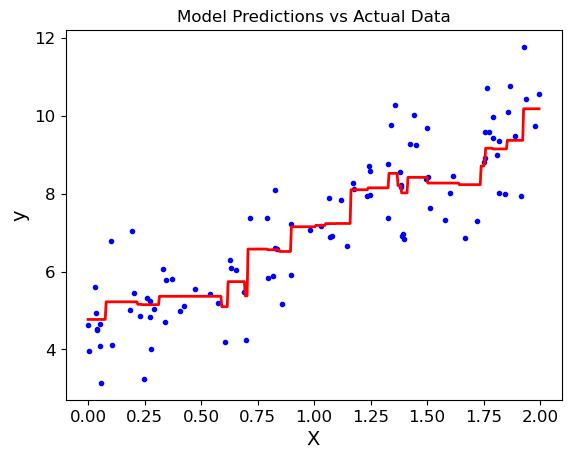

In [22]:
 #Make predictions on the training data
# 
plot_predictions(optimal_gb_model, X_train, y_train)


### Create Optimal RandomForestRegressor Model

In [23]:
best_params_rf = grid_search_rf_final.best_params_

# Initialize the RandomForestRegressor model with the best parameters
optimal_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)

# Fit the model to the training data
optimal_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=6, n_estimators=95,
                      random_state=42)

### Plot Model Predictions for Training Set

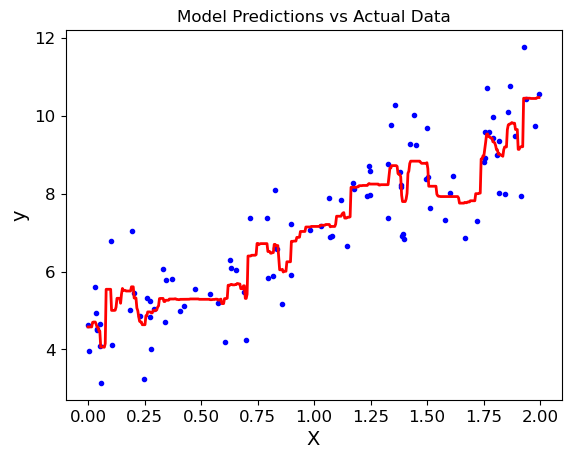

In [24]:
plot_predictions(optimal_rf_model, X_train, y_train)

### Create Optimal DecisionTreeRegressor Model

In [25]:
best_params_dt = grid_search_dt_coarse.best_params_

# Initialize the DecisionTreeRegressor model with the best parameters
optimal_dt_model = DecisionTreeRegressor(**best_params_dt, random_state=42)

# Fit the model to the training data
optimal_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=10, random_state=42)

### Plot Model Predictions for Training Set

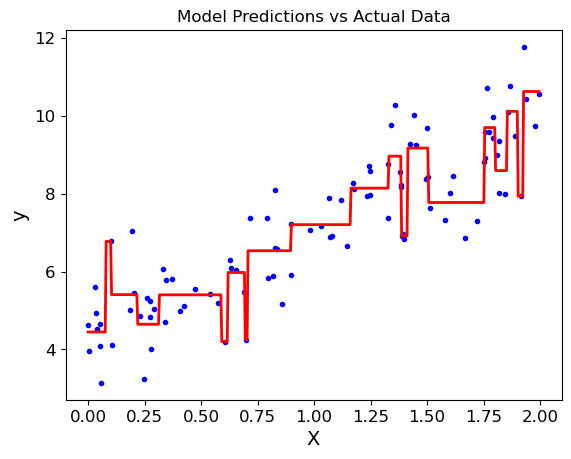

In [26]:
plot_predictions(optimal_dt_model, X_train, y_train)

# Compute Generalization Error

Compute the generalization error for each of the optimal models computed above.  Use MSE as the generalization error metric.  Round your answers to four decimal places.  Print the generalization error for all three models.

In [27]:


# Make predictions on the test set using the optimal GradientBoostingRegressor model
predictions_gb_test = optimal_gb_model.predict(X_test)
# Calculate the MSE for GradientBoostingRegressor
mse_gb = mean_squared_error(y_test, predictions_gb_test)

# Make predictions on the test set using the optimal RandomForestRegressor model
predictions_rf_test = optimal_rf_model.predict(X_test)
# Calculate the MSE for RandomForestRegressor
mse_rf = mean_squared_error(y_test, predictions_rf_test)

# Make predictions on the test set using the optimal DecisionTreeRegressor model
predictions_dt_test = optimal_dt_model.predict(X_test)
# Calculate the MSE for DecisionTreeRegressor
mse_dt = mean_squared_error(y_test, predictions_dt_test)

# Print the generalization error (MSE) for all three models
print("Generalization error for GradientBoostingRegressor:", round(mse_gb, 4))
print("Generalization error for RandomForestRegressor:", round(mse_rf, 4))
print("Generalization error for DecisionTreeRegressor:", round(mse_dt, 4))


Generalization error for GradientBoostingRegressor: 1.4501
Generalization error for RandomForestRegressor: 1.3293
Generalization error for DecisionTreeRegressor: 1.5376


# Critical Analysis

Think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results. Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results? Can you see any relationship between the prediction curves and the generalization error?

I am looking for **meaningful content** here.  Do not copy-and-paste model definitions off of the Internet.  You should think and write critically.


[1:Gradient Boosting is like a team trying to make a decision collectlively through the following process, where each member (weak learner, ) is trained to correct the mistakes of the previous one. It starts with a simple model like a simple decision tree,  and then builds more models to fix the errors made by the previous ones, similar to how a person  learns from their mistakes in school or life or any ecision making process and improves their understanding over time. to eventually learn to make fewr mistakes,leading to  better or more accurate decisions.Random Forest is a bit like having a bunch of people work on a project together if the project consisted of making many decision tasks . Each person (which could be compared to a  decision tree) gets a random part of the main decision task to work on, and then all their dedecisions are combined to make the final report or decision. This helps to reduce mistakes and ensures a more accurate result.analagous to the concept of wisdom of the crowd discussed in our video lessons.finally,  decision Trees are the simplest of the bunch. They work by asking a series of questions about the data, like a flowchart, to ultimately make a prediction. It's like making decisions based on a set of rules, similar to how you might make decisions by following a set of instructions.in the case of decision trees, the decisions they make are influenced and are aimed to make decisions that lead to highest purity,or minimum impurity at each step of the decision making process.2: When we compare the results predicted by these models, we can see some differences. The Random Forest model had the lowest error, meaning it made the most accurate predictions. The Gradient Boosting model did pretty well too, but it had a bit higher error than the Random Forest. Then, the Decision Tree model had the highest error, so its predictions were less accurate.
Now, thinking about how the algorithms relate to the results, it seems like the Random Forest and Gradient Boosting models, which use a bunch of decision trees together, did better than just using a single Decision Tree model. That makes sense because combining lots of decision trees can help catch more patterns in the data and make more accurate predictions. it could also be concluded with certainty that ensemble methods like Random Forest and Gradient Boosting tend to perform better than individual Decision Tree models. This makes sense because ensemble methods combine multiple decision trees to make predictions, which helps reduce prediction errors. in addition, it seems like the aparent connection between the algorithms and how well the models do. Like, the Random Forest and Gradient Boosting models, which use a bunch of decision trees together, did better than just using a single Decision Tree model.3: when I look at the prediction curves and how accurate the models are overall, it seems like there might be a connection. If the prediction curve is really close to the actual data points, then the generalization error might be lower because the model is doing a good job of predicting. But if the prediction curve is kind of all over the place and really jagged, then the generalization error might be higher because the model isn't doing as well. So, maybe there's a relationship between how smooth and accurate the prediction curve is and how well the model predicts overall.I also noticed that the prediction curves for the optimized models compared to the non optimized model are relatively smoother. ] 

# Final Model Selection and Justification

Based on the arguments outlined in your critical analysis, make one final model recommendation.  Which model best characterizes this data?  In other words, which of these models is going to generalize better? Consider all factors.  What is the type of the optimal model (i.e. `GradientBoostingRegressor`, `RandomForestRegressor`, or `DecisionTreeRegressor`)? What are the optimal model hyperparameters that should be used for training on this data set?    Succinctly summarize the justification for your choice based on your arguments made above in the critical analysis section.


[Based on what I've seen, Ibelieve  the Random Forest model is the best pick for this dataset. It consistently had the lowest error compared to the other models, which means it's really good at making predictions, compaed to the other models.which makes sense because , Random Forest uses a bunch of decision trees together, which helps it find patterns in the data betterThe gradient Boosting Regrssor model's performance was good too, but the Random Forest Ressor model outperformed it by .
The Gradient Boosting model was a close second, but it had a slightly higher error compared to Random Forest. Still, it did pretty well overall. Soin conclusion, the best model for this dataset is RandomForestRegressor. And we should use these specific settings when training it: max_depth of 5, n_estimators of 95, and min_samples_split of 6. These settings were chosen because they made the model do the best job of predicting on this dataset.] 